In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#import warnings
#warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## 8. Обучение без учителя в Scikit-learn¶

### Задание 1<br>
__1.1__ Импортируйте библиотеки ```pandas```, ```numpy``` и ```matplotlib```. Загрузите "```Boston House Prices dataset```" из встроенных наборов данных библиотеки ```sklearn```. Создайте датафреймы ```X``` и ```y``` из этих данных.

__Решение:__<br>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
Y = pd.DataFrame(boston['target'], columns=['price'])

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


__1.2__ Разбейте эти датафреймы на тренировочные (```X_train```, ```Y_train```) и тестовые (```X_test```, ```Y_test```) с помощью функции ```train_test_split``` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент ```random_state``` должен быть равен 42.

__Решение:__<br>

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


__1.3__ Масштабируйте данные с помощью ```StandardScaler```.

__Решение:__<br>

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

__1.4__ Постройте модель ```TSNE``` на тренировочный данных с параметрами: ```n_components=2, learning_rate=250, random_state=42```.

__Решение:__<br>

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [16]:
X_train_scaled_tsne = tsne.fit_transform(X_train_scaled)

__1.5__ Постройте диаграмму рассеяния на этих данных.

__Решение:__<br>

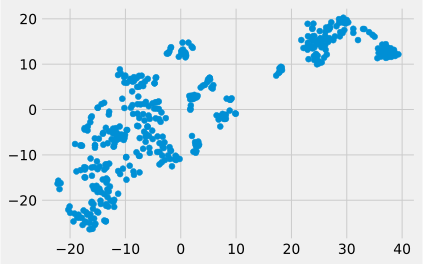

In [17]:
plt.scatter(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1])
plt.show()

### Задание 2

__2.1__ С помощью ```KMeans``` разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма ```X_train```. Параметр ```max_iter``` должен быть равен 100, ```random_state``` сделайте равным 42.

__Решение:__<br>

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [20]:
kmeans.fit(X_train_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=42)

__2.2__ Постройте еще раз диаграмму рассеяния на данных, полученных с помощью ```TSNE```, и раскрасьте точки из разных кластеров разными цветами.

__Решение:__<br>

In [21]:
train_labels = kmeans.labels_

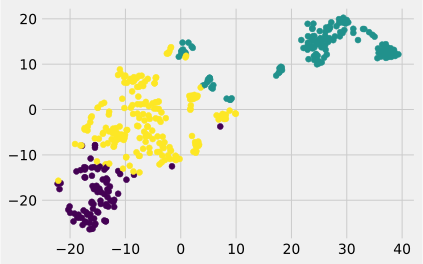

In [22]:
plt.scatter(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1], c=train_labels)
plt.show()

__2.3__ Вычислите средние значения ```price``` и ```CRIM``` в разных кластерах.

__Решение:__<br>

In [23]:
train_clusters = pd.DataFrame({'cluster':kmeans.labels_, 'price': Y_train.price.values, 'CRIM': X_train.CRIM.values})

In [28]:
train_clusters.groupby('cluster')['price', 'CRIM'].mean()

,price,CRIM
cluster,,
0,27.788372,0.073566
1,16.165354,10.797028
2,24.958115,0.421660


### $^*$Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

__Решение:__<br>

In [29]:
test_labels = kmeans.predict(X_test_scaled)

In [30]:
test_clusters = pd.DataFrame({'cluster': test_labels, 'price': Y_test.price.values, 'CRIM': X_test.CRIM.values})

In [31]:
test_clusters.groupby('cluster')['price', 'CRIM'].mean()

,price,CRIM
cluster,,
0,31.350000,0.062060
1,16.437143,10.165531
2,21.860784,0.266079
